In [2]:
!pip install -q tensorflow-datasets

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import numpy as np

IMG_SIZE = 160

(ds_train, ds_val), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    with_info=True,
    as_supervised=True
)

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train_ds = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = ds_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Transfer learning model
base = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)
base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_ds, validation_data=val_ds, epochs=2)

# Save the model so we don’t retrain every time
model.save("/content/catdog_model.h5")
print("Model saved successfully!")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.WD4YW7_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2
582/582 ━━━━━━━━━━━━━━━━━━━━ 440s 746ms/step - accuracy: 0.9310 - loss: 0.1645 - val_accuracy: 0.9785 - val_loss: 0.0631
Epoch 2/2
582/582 ━━━━━━━━━━━━━━━━━━━━ 430s 725ms/step - accuracy: 0.9784 - loss: 0.0596 - val_accuracy: 0.9794 - val_loss: 0.0588


Model saved successfully!


Model loaded successfully!

Upload cat/dog image (jpg/png):


Saving cat.jpg to cat.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


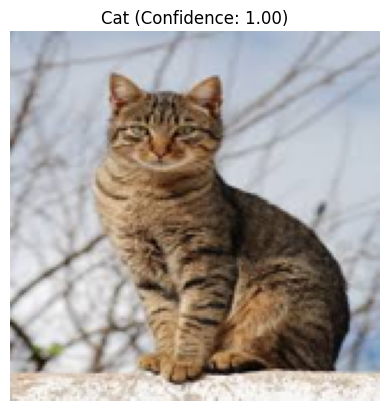

In [7]:
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 160
class_names = ["Cat", "Dog"]

# Load saved model (does NOT train again)
model = load_model("/content/catdog_model.h5")
print("Model loaded successfully!")

def preprocess_img(path):
    img = Image.open(path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))
    arr = np.array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    return img, arr

def predict_image(path):
    img, arr = preprocess_img(path)
    prob = model.predict(arr)[0][0]
    label = "Dog" if prob > 0.5 else "Cat"
    conf = prob if prob > 0.5 else (1 - prob)

    plt.imshow(img)
    plt.title(f"{label} (Confidence: {conf:.2f})")
    plt.axis("off")
    plt.show()

print("\nUpload cat/dog image (jpg/png):")
uploaded = files.upload()
for filename in uploaded.keys():
    predict_image(filename)
